In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import pandas as pdim
import numpy as np

 q

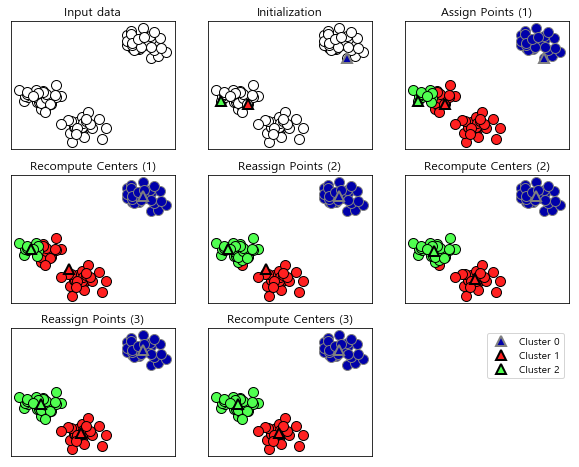

In [2]:
mglearn.plots.plot_kmeans_algorithm()

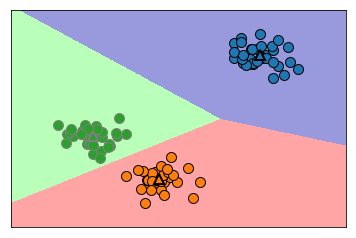

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# 인위적으로 2차원 데이터 생성 
x, y = make_blobs(random_state=1)
print(x[0:5])
print(y[0:5])
# Cluster model 생성
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

[[ -0.79415228   2.10495117]
 [ -9.15155186  -4.81286449]
 [-11.44182631  -4.45781441]
 [ -9.76761777  -3.19133737]
 [ -4.53655648  -8.40186288]]
[0 1 1 1 2]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
#데이터의 결과값
lbl = kmeans.labels_
print(lbl)

[1 0 4 0 2 2 2 0 3 1 0 0 2 3 2 2 2 1 0 4 2 0 2 1 0 2 2 1 1 2 3 1 2 1 0 2 0
 4 0 2 2 0 1 4 0 2 3 1 3 1 0 2 2 2 3 2 4 0 3 1 0 2 2 0 4 2 3 2 1 0 0 0 2 3
 3 0 2 2 1 4 3 4 0 2 1 1 3 1 4 3 2 1 3 4 0 2 2 3 2 1]


In [6]:
#예측한 값
pre = kmeans.predict(x)
print(pre)

[1 0 4 0 2 2 2 0 3 1 0 0 2 3 2 2 2 1 0 4 2 0 2 1 0 2 2 1 1 2 3 1 2 1 0 2 0
 4 0 2 2 0 1 4 0 2 3 1 3 1 0 2 2 2 3 2 4 0 3 1 0 2 2 0 4 2 3 2 1 0 0 0 2 3
 3 0 2 2 1 4 3 4 0 2 1 1 3 1 4 3 2 1 3 4 0 2 2 3 2 1]


In [7]:
#정확도
print(len(pre==lbl) / len(lbl))

1.0


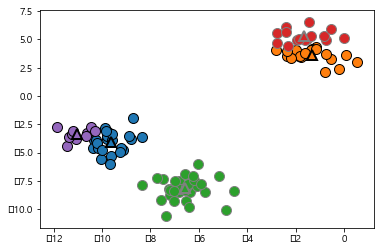

In [8]:
#5개의 cluster를 산점도로 표현
mglearn.discrete_scatter(x[:, 0], x[:, 1], lbl, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2, 3, 4], 
    markers = '^', markeredgewidth = 2)

In [9]:
#붓꽃 Datasets 로딩
from sklearn import datasets
iris = datasets.load_iris()

In [10]:
#0~4행 출력
print(iris.data[0:5])
#변수명 출력(Data 특성)
print(iris.feature_names)
#품종 레이블 출력
print(iris.target[0:5])
#품종 이름 출력
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [11]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [16]:
x.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

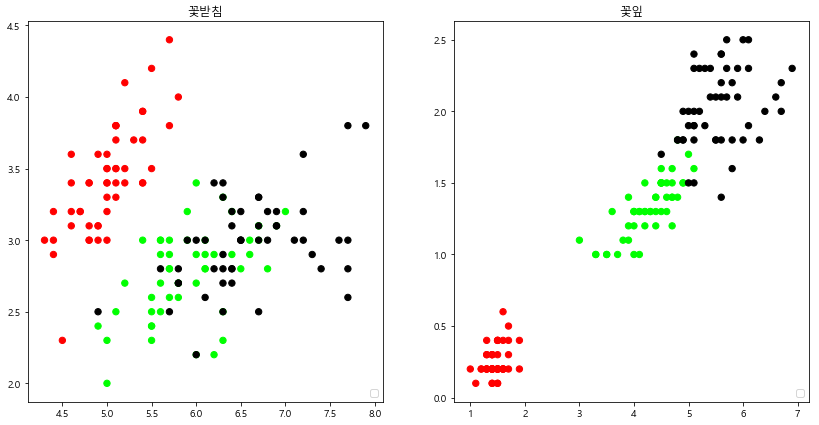

In [27]:
# 그래프 사이즈
plt.figure(figsize=(14,7))
# 색상 배열 추가
colormap = np.array(['red', 'lime', 'black'])
# 꽃받침 기준 그래프 (Clustering이 어려운 상태)
plt.subplot(1, 2, 1)
plt.legend(["Setosa","Versicolor","Virginica"], loc=4)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c = colormap[y.Targets], s = 40)
plt.title('꽃받침')
# 꽃잎 기준 그래프 (Clustering이 잘 되어 있음)
plt.subplot(1, 2, 2)
plt.legend(["Setosa","Versicolor","Virginica"], loc=4)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title('꽃잎')

In [28]:
# K-Means Cluster Model 생성 (Cluster 3개)
model = KMeans(n_clusters = 3)
# 비지도 학습이므로 답을 제외한 데이터만으로 학습 실시
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
# Clustering을 한 결과 (컴퓨터가 분류한 결과 값)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

Text(0.5, 1.0, '클러스터링 결과')

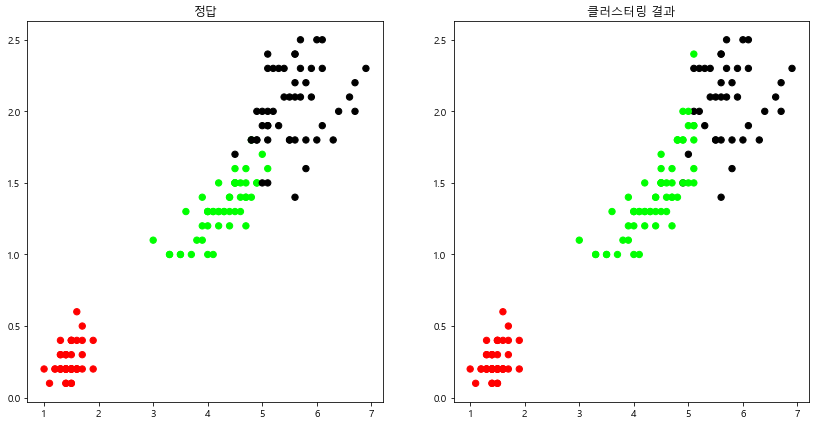

In [49]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red','lime', 'black'])
# 그래프 출력 (정답)
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답')
# 그래프 출력 (클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('클러스터링 결과')

In [51]:
# 모델의 정확도
import sklearn.metrics as sm
sm.accuracy_score(y, model.labels_)

0.8933333333333333

In [53]:
#분류 결과표 출력
sm.confusion_matrix(y, model.labels_)
# 품종 1은 50개 중 50개를 정확히 맞춤
# 품종 2는 50개 중 48개를 맞추고 2개가 틀림
# 품종 3은 50개 중 36개를 맞추고 14개가 틀림

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)